<a href="https://colab.research.google.com/github/robertferro/previsao_plano_saude/blob/main/previsao_fumante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão se o cliente é fumante ou não

# ETL(extract transform and load)

Nesta etapa os dados serão carregados e serão feitas algumas transformações caso sejam necessárias, com tratamento de outliers, valores ausentes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/robertferro/previsao_plano_saude/main/dados_plano.csv'
dados = pd.read_csv(url)
dados.head()

,Idade,Sexo,IMC,Filhos,Fumante,Regiao,Custos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# verificando informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Idade    1338 non-null   int64  
 1   Sexo     1338 non-null   object 
 2   IMC      1338 non-null   float64
 3   Filhos   1338 non-null   int64  
 4   Fumante  1338 non-null   object 
 5   Regiao   1338 non-null   object 
 6   Custos   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Tranformando variáveis categóricas em variáveis numéricas.

Poderia ser feito utilizando a biblioteca sklearn, a função get_dummies do pandas ou usando uma transformação por meio de dicionário.

In [4]:
dic_sexo = {'male':0,
           'female':1}

dic_fumante = {'yes':1,
              'no':0}

dic_regiao = {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}


dados['Sexo'] = dados['Sexo'].map(dic_sexo)

dados['Fumante'] = dados['Fumante'].map(dic_fumante)

dados['Regiao'] = dados['Regiao'].map(dic_regiao)

dados.head()

,Idade,Sexo,IMC,Filhos,Fumante,Regiao,Custos
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


# EDA

In [5]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
Sexo,1338.0,0.494768,0.500160,0.0000,0.00000,0.000,1.000000,1.00000
IMC,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
Filhos,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
Fumante,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
Regiao,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000
Custos,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


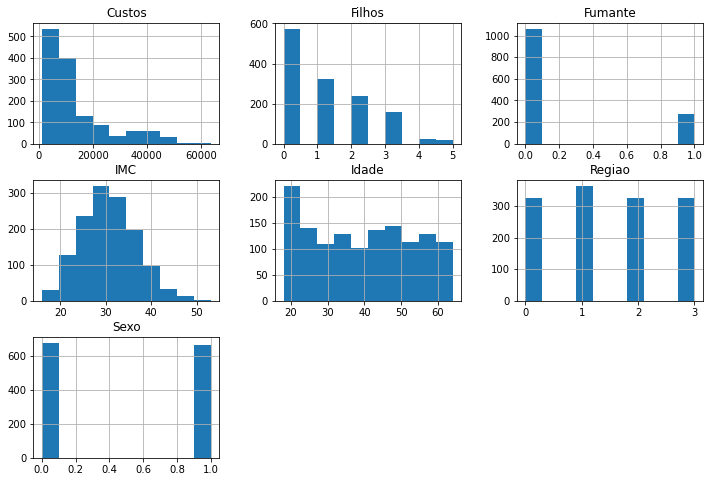

In [ ]:
dados.hist(figsize=(12,8));

Analisando o dataset. podem ser feitas algumas considerações:

- 75% dos registros tem custo inferior ou igual a 16639.912515

- Os dados estão bem distribu´dos. exceto com relação a variável alvo "Fumante", que apresenta mais pessoas que não são fumantes e a variável "Filhos", onde as categorias 4 ou 5 filhos apresentam menor número de registros.

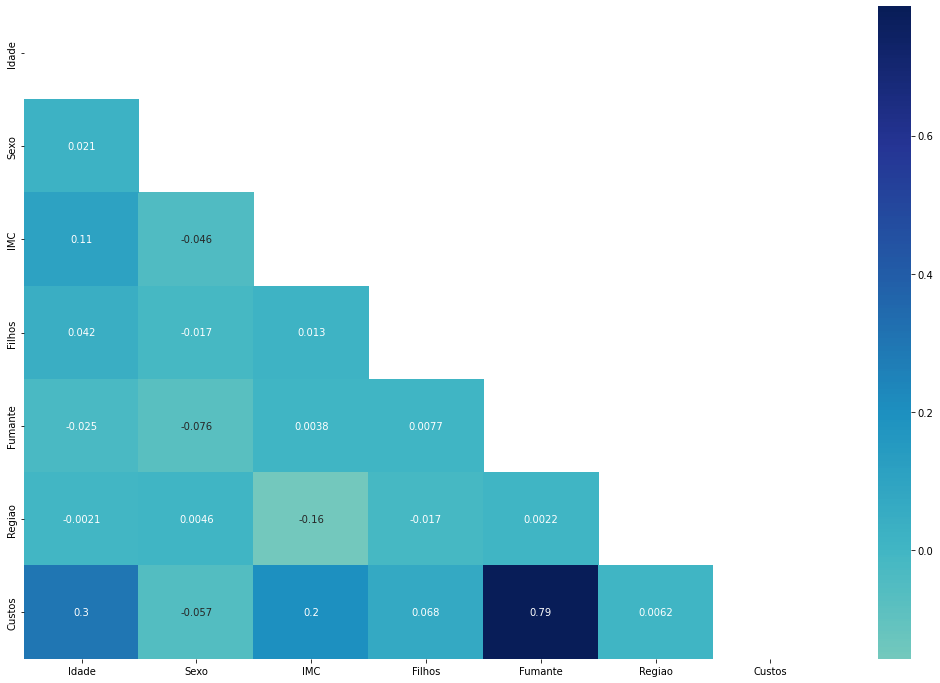

In [6]:
plt.figure(figsize=(18,12))

corr = dados.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

plt.show()

Com Relação a correlação entre variáveis:

- Idade e Custo tem uma correlação positiva de 0.3, o que indica que os custos tendem a aumentar de acordo com a idade.

- Fumante e Custos tem correlação positiva de 0.79, forte, que indica a condição de ser fumante oou não implica diretamente nos custos.

- O IMC também exerce influência no custo, já  que esse é um índice que diz se a pessoa está ou não dentro do peso recomendado, o que pode implicar em seu estado de saúde e consequentemente nos custos.

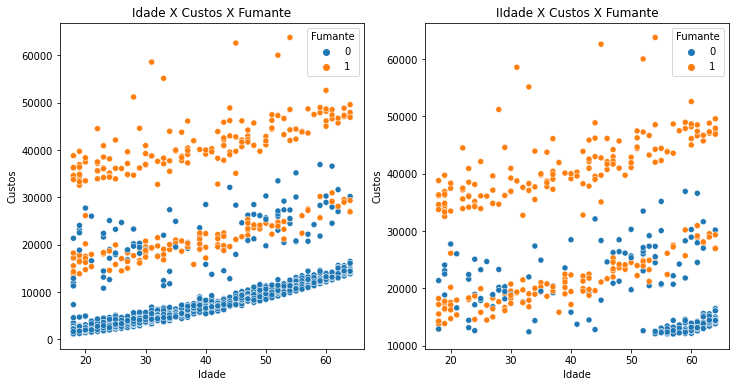

In [22]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
sns.scatterplot(y='Custos',x='Idade',data=dados,hue='Fumante',ax=ax[0])
ax[0].set_title('Idade X Custos X Fumante');

sns.scatterplot(y='Custos',x='Idade',data=dados[dados['Custos']>12000],hue='Fumante',ax=ax[1]);
ax[1].set_title('IIdade X Custos X Fumante');

Análises:

- Pessoas não fumantes se concentram com custos abaixo de 12 mil, independentemente da idade.
- O fato de ser Fumante ou não pode elevar até em 10X os custos.
- Quando os custos são superiores a 12 mil, a maioria dos registros são de possoas fumantes.
- A maioria dos registros de pessoas não fumantes que ultrapassam os custos de 12 mil, se concentram na faixa etária de 52 a 64 anos.

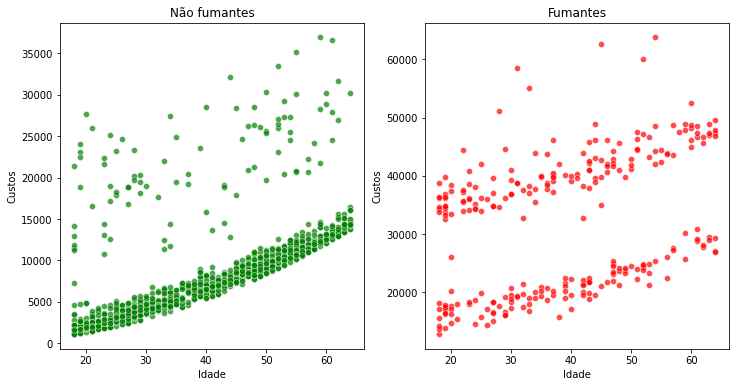

In [20]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.scatterplot(y='Custos',x='Idade',data=dados[dados['Fumante']==0], ax=ax[0],color='g',alpha=0.7);
ax[0].set_title('Não fumantes')

sns.scatterplot(y='Custos',x='Idade',data=dados[dados['Fumante']==1], ax=ax[1],color='r', alpha=0.7);
ax[1].set_title('Fumantes');

In [ ]:
dados[dados['Fumante']==0][['Custos','Idade']].describe().T

,count,mean,std,min,25%,50%,75%,max
Custos,1064.0,8434.268298,5993.781819,1121.8739,3986.4387,7345.4053,11362.88705,36910.60803
Idade,1064.0,39.385338,14.083410,18.0000,26.7500,40.0000,52.00000,64.00000


In [ ]:
dados[dados['Fumante']==1][['Custos','Idade']].describe().T

,count,mean,std,min,25%,50%,75%,max
Custos,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801
Idade,274.0,38.514599,13.923186,18.0000,27.000000,38.00000,49.000000,64.00000


no minimo 75% das pessoas não fumantes tem custo do plano de saúde inferior a pessoas fumantes.

o Custo mínimo para pessoas fumantes é de mais de 10x o custo mínimo para pessoas não fumantes.

A correlação entre Custo e Idade existe, porém, para pessoas não fumantes os custos são em média menores do que para pessoas fumantes.

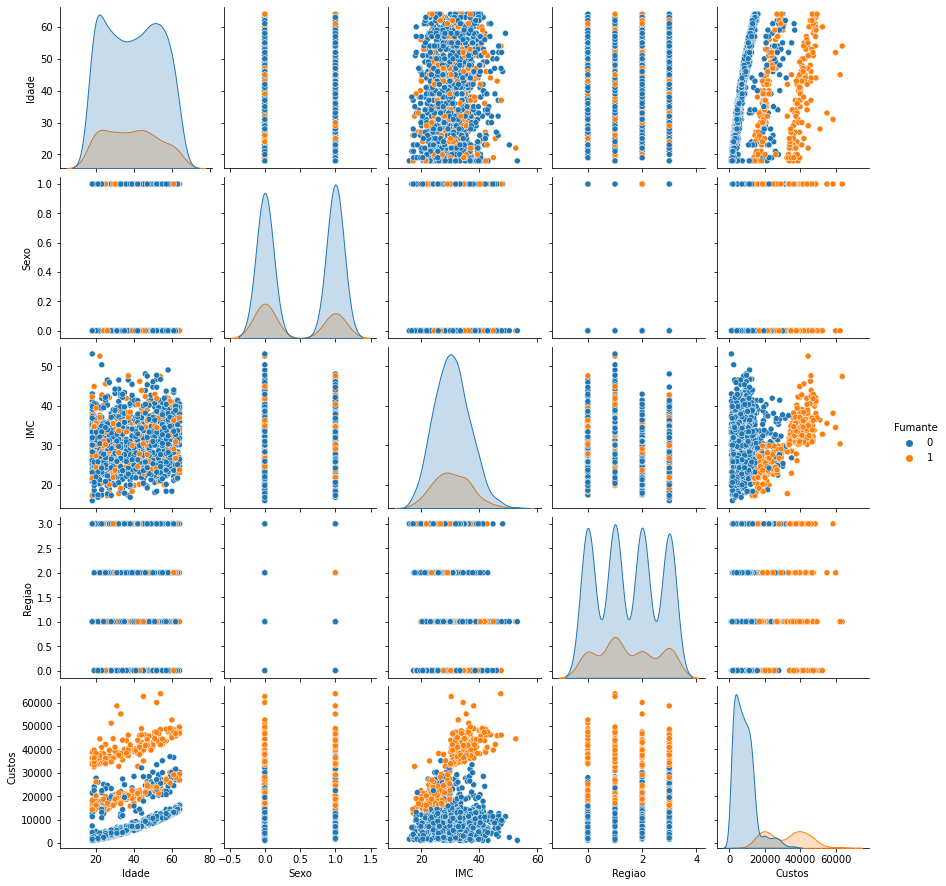

In [23]:
sns.pairplot(data=dados.drop('Filhos',axis=1),hue='Fumante')

In [24]:
dados.Fumante.value_counts()

0    1064
1     274
Name: Fumante, dtype: int64

# Machine Learning

- Divisão do dataset em treino, teste e validação.

- Escolha de um modelo

- Tunagem, validação e avaliação do modelo escolhido

- Previsões para amostra de validação

- Avalição da amostra de validação

In [67]:
X = dados.drop('Fumante',axis=1)
y = dados['Fumante']

In [68]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,y, test_size=0.2 ,stratify=y)


A acurácia do dummy mostfrequent foi 79.48%
0.5
              precision    recall  f1-score   support

           0       0.79      1.00      0.89       213
           1       0.00      0.00      0.00        55

    accuracy                           0.79       268
   macro avg       0.40      0.50      0.44       268
weighted avg       0.63      0.79      0.70       268



Text(33.0, 0.5, 'Real ( 1 ou 0)')

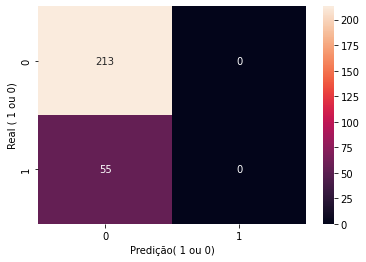

In [69]:
from sklearn.metrics import  roc_auc_score,roc_curve, classification_report
from sklearn import metrics
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

y_proba = dummy_clf.predict_proba(X_teste)

print(roc_auc_score(Y_teste, y_proba[:,1]))
print(classification_report(Y_teste, y_pred))

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [70]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=10)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Treino: 0.9532710280373832
Validation score 0.9336448598130843
Teste: 0.9552238805970149
ROC AUC
Treino 0.9875247492877033
Test 0.9836107554417414
GaussianNB
Treino: 0.905607476635514
Validation score 0.9037383177570092
Teste: 0.9029850746268657
ROC AUC
Treino 0.9753446120331171
Test 0.9756722151088348
DecisionTreeClassifier
Treino: 1.0
Validation score 0.9514018691588785
Teste: 0.9664179104477612
ROC AUC
Treino 1.0
Test 0.9518992744344856
RandomForestClassifier
Treino: 1.0
Validation score 0.9598130841121495
Teste: 0.9701492537313433
ROC AUC
Treino 1.0
Test 0.994579598804951
XGBClassifier
Treino: 0.9841121495327103
Validation score 0.9570093457943925
Teste: 0.9664179104477612
ROC AUC
Treino 0.9995814754599746
Test 0.9924882629107982


# XGBClassifier

In [109]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

kf = KFold(n_splits=15,random_state=0,shuffle=True)

f1_lista=[]
for i,(tr,ts) in enumerate(kf.split(X)):
    Xtr, ytr = X.iloc[tr], y.iloc[tr]
    Xval, yval = X.iloc[ts], y.iloc[ts]
    
    clf = XGBClassifier(max_depth=10,n_estimators=50,seed=42)
    clf.fit(Xtr,ytr)
    
    y_pred=clf.predict(Xval)

    f1_score_ = f1_score(yval,y_pred)
    f1_lista.append(f1_score_)
    print('Fold: {}'.format(i))
    # print('-'*60)
    print('F1_Score: {:.4f}'.format(f1_score_))
    # print(classification_report(yval, y_pred))
    print('='*40)

f1_medio=np.mean(f1_lista)
print('F1 Score médio: {:.4f}'.format(f1_medio))

Fold: 0
F1_Score: 0.9412
Fold: 1
F1_Score: 0.8889
Fold: 2
F1_Score: 0.9655
Fold: 3
F1_Score: 0.9268
Fold: 4
F1_Score: 0.9500
Fold: 5
F1_Score: 0.9630
Fold: 6
F1_Score: 0.8824
Fold: 7
F1_Score: 0.8889
Fold: 8
F1_Score: 0.9143
Fold: 9
F1_Score: 0.9444
Fold: 10
F1_Score: 0.9615
Fold: 11
F1_Score: 1.0000
Fold: 12
F1_Score: 0.9545
Fold: 13
F1_Score: 0.8421
Fold: 14
F1_Score: 0.9231
F1 Score médio: 0.9298


A acurácia do XGBCLassifier foi 96.63%


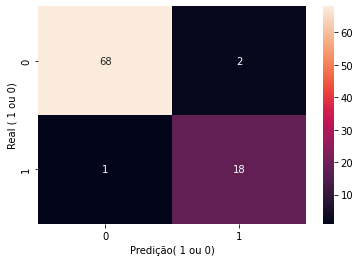

ROC AUC : 0.9932330827067668



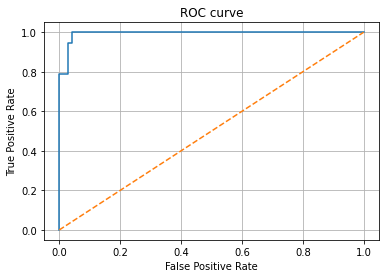

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.90      0.95      0.92        19

    accuracy                           0.97        89
   macro avg       0.94      0.96      0.95        89
weighted avg       0.97      0.97      0.97        89



In [110]:
y_pred = clf.predict(Xval)

y_proba = clf.predict_proba(Xval)
cm=confusion_matrix(yval, y_proba[:,1]>0.5)
sns.heatmap(cm, annot=True, fmt='g')
# f1_score_xgb = f1_score(yval,y_pred)
# print('F1 Score do XGBCLassifier foi: {:.4f}'.format(f1_score_xgb))

acuracia = clf.score(Xval, yval) * 100
print('A acurácia do XGBCLassifier foi %.2f%%' % acuracia)


plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

plt.show()


roc_auc = roc_auc_score(yval, y_proba[:,1])
print('ROC AUC :',roc_auc)

print()

fpr, tpr, thresholds = metrics.roc_curve(yval,y_proba[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


print(classification_report(yval, y_proba[:,1]>0.5))


# LogisticRegression

In [122]:
kf = KFold(n_splits=15,random_state=0,shuffle=True)

f1_lista=[]
for i,(tr,ts) in enumerate(kf.split(X)):
    Xtr, ytr = X.iloc[tr], y.iloc[tr]
    Xval, yval = X.iloc[ts], y.iloc[ts]
    
    clf = LogisticRegression(class_weight={0:0.5},random_state=42)
    clf.fit(Xtr,ytr)
    
    y_pred=clf.predict(Xval)

    f1_score_ = f1_score(yval,y_pred)
    f1_lista.append(f1_score_)
    print('Fold: {}'.format(i))
    # print('-'*60)
    print('F1_Score: {:.4f}'.format(f1_score_))
    # print(classification_report(yval, y_pred))
    print('='*40)

f1_medio=np.mean(f1_lista)
print('F1 Score médio: {:.4f}'.format(f1_medio))

Fold: 0
F1_Score: 0.9412
Fold: 1
F1_Score: 0.9000
Fold: 2
F1_Score: 0.9032
Fold: 3
F1_Score: 0.9362
Fold: 4
F1_Score: 0.9048
Fold: 5
F1_Score: 0.8966
Fold: 6
F1_Score: 0.8889
Fold: 7
F1_Score: 0.8889
Fold: 8
F1_Score: 0.8780
Fold: 9
F1_Score: 0.9444
Fold: 10
F1_Score: 0.9091
Fold: 11
F1_Score: 0.9375
Fold: 12
F1_Score: 0.9167
Fold: 13
F1_Score: 0.8163
Fold: 14
F1_Score: 0.8837
F1 Score médio: 0.9030


A acurácia do LogistcRegression foi 94.38%


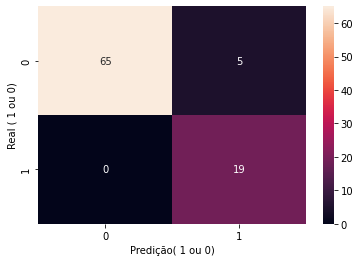

ROC AUC : 0.9571428571428571



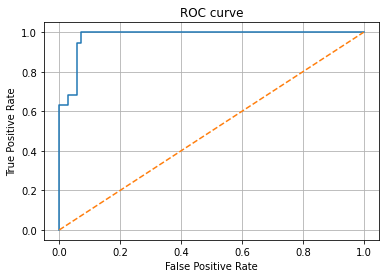

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        70
           1       0.79      1.00      0.88        19

    accuracy                           0.94        89
   macro avg       0.90      0.96      0.92        89
weighted avg       0.96      0.94      0.95        89



In [123]:
y_pred = clf.predict(Xval)

y_proba = clf.predict_proba(Xval)
cm=confusion_matrix(yval, y_proba[:,1]>0.5)
sns.heatmap(cm, annot=True, fmt='g')
# f1_score_xgb = f1_score(yval,y_pred)
# print('F1 Score do XGBCLassifier foi: {:.4f}'.format(f1_score_xgb))

acuracia = clf.score(Xval, yval) * 100
print('A acurácia do LogistcRegression foi %.2f%%' % acuracia)


plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

plt.show()


roc_auc = roc_auc_score(yval, y_proba[:,1]>0.1)
print('ROC AUC :',roc_auc)

print()

fpr, tpr, thresholds = metrics.roc_curve(yval,y_proba[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


print(classification_report(yval, y_proba[:,1]>0.5))


# SVC

# Analisando as previsões

In [124]:

Xval['y_pred'] = y_pred
Xval['y_proba'] = y_proba[:,1]
Xval['yval'] = yval

Xval.head()

,Idade,Sexo,IMC,Filhos,Regiao,Custos,y_pred,y_proba,yval
28,23,0,17.385,1,2,2775.19215,0,0.031883,0
57,18,0,31.680,2,1,34303.16720,1,0.998727,1
72,53,1,28.100,3,0,11741.72600,0,0.008307,0
84,37,1,34.800,2,0,39836.51900,1,0.998628,1
87,56,1,27.200,0,0,11073.17600,0,0.009422,0


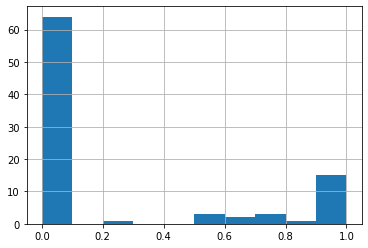

In [125]:
Xval['y_proba'].hist()

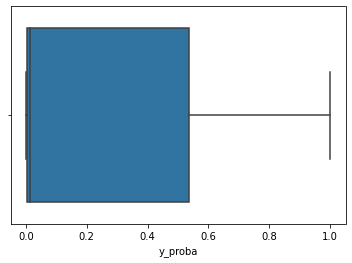

In [126]:
sns.boxplot(x='y_proba', data=Xval)

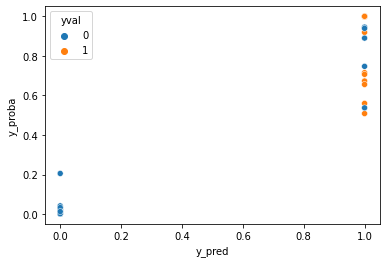

In [127]:
sns.scatterplot(y='y_proba',x='y_pred',data=Xval,hue='yval');

In [130]:
Xval[['y_proba']].describe()

,y_proba
count,89.000000
mean,0.243185
std,0.391560
min,0.000474
25%,0.003961
50%,0.012891
75%,0.537236
max,1.000000


In [45]:
Xval[Xval['y_proba']>0.57].y_pred.value_counts()

1    15
Name: y_pred, dtype: int64

In [46]:
display(Xval[(Xval['y_proba']<0.57)].y_pred.value_counts())
display(Xval[(Xval['y_proba']<0.57)].yval.value_counts())

0    51
Name: y_pred, dtype: int64

0    51
Name: yval, dtype: int64

In [47]:
display(Xval[(Xval['y_proba']>0.57) & (Xval['y_proba']<=0.72)].y_pred.value_counts())
display(Xval[(Xval['y_proba']>0.57) & (Xval['y_proba']<=0.72)].yval.value_counts())

1    3
Name: y_pred, dtype: int64

1    3
Name: yval, dtype: int64

In [48]:
display(Xval[(Xval['y_proba']>0.72) & (Xval['y_proba']<=0.9318)].y_pred.value_counts())
display(Xval[(Xval['y_proba']>0.72) & (Xval['y_proba']<=0.9318)].yval.value_counts())

Series([], Name: y_pred, dtype: int64)

Series([], Name: yval, dtype: int64)

In [ ]:
display(Xval[(Xval['y_proba']>0.9318) & (Xval['y_proba']<=0.998754)].y_pred.value_counts())
display(Xval[(Xval['y_proba']>0.9318) & (Xval['y_proba']<=0.998754)].yval.value_counts())

In [ ]:
display(Xval[Xval['y_proba']>=0.998754].y_pred.value_counts())
display(Xval[Xval['y_proba']>=0.998754].yval.value_counts())

In [ ]:
Xval[Xval['y_proba']>0.57]['y_proba'].describe()

# Salvando o modelo

In [116]:
import pickle

output = open('best_model', 'wb')
pickle.dump(clf, output)
output.close()

In [118]:
dados[dados['Fumante']==1]

,Idade,Sexo,IMC,Filhos,Fumante,Regiao,Custos
0,19,1,27.900,0,1,0,16884.92400
11,62,1,26.290,0,1,1,27808.72510
14,27,0,42.130,0,1,1,39611.75770
19,30,0,35.300,0,1,0,36837.46700
23,34,1,31.920,1,1,3,37701.87680
...,...,...,...,...,...,...,...
1313,19,1,34.700,2,1,0,36397.57600
1314,30,1,23.655,3,1,2,18765.87545
1321,62,0,26.695,0,1,3,28101.33305
1323,42,1,40.370,2,1,1,43896.37630


In [ ]:
19	1	27.900	0	1	0	16884.92400